# Cálculo de derivadas numéricas y errores
### Autor: Luis M. de la Cruz Salas
### Rev: 26/06/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Aproximación de la primera derivada usando diferencias finitas hacía adelante (Forward):

$\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

In [2]:
def forwardFD(u,x,h):
    """ Esquema de diferencias finitas hacia adelante
    u : es la función a evaluar
    x : es la posición
    h : es el tamaño de malla.
    """
    return (u(x+h)-u(x))/h

* Aproximación de la primera derivada usando diferencias finitas hacía atrás (Backward):

$\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

In [3]:
def backwardFD(u,x,h):
    """ Esquema de diferencias finitas hacia atrás
    u : es la función a evaluar
    x : es la posición
    h : es el tamaño de malla.
    """
    return (u(x)-u(x-h))/h

* Aproximación de la primera derivada usando diferencias finitas hacía centradas (Centered):

$\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

In [4]:
def centeredFD(u,x,h):
    """ Esquema de diferencias finitas centradas
    u : es la función a evaluar
    x : es la posición
    h : es el tamaño de malla.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [5]:
def u(x):
    """ Esta función es la que deseo evaluar
    """
    return np.sin(x)

In [6]:
def uprime(x):
    """ Esta es la derivada de la función f(x) """
    return np.cos(x)

In [7]:
def error(ue, un):
    return np.fabs(un - ue)

In [8]:
h = np.array([0.1,0.05,0.01,0.005,0.001])

In [9]:
unos = np.ones(5)

In [10]:
ef = error(uprime(unos),forwardFD(u,1,h))
eb = error(uprime(unos),backwardFD(u,1,h))
ec = error(uprime(unos),centeredFD(u,1,h))

In [11]:
dframe = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), 
                      columns=['$h$','$D_+$', '$D_-$','$D_0$'])
dframe

,$h$,$D_+$,$D_-$,$D_0$
0,0.100,0.042939,0.041138,9.000537e-04
1,0.050,0.021257,0.020807,2.250978e-04
2,0.010,0.004216,0.004198,9.004993e-06
3,0.005,0.002106,0.002101,2.251257e-06
4,0.001,0.000421,0.000421,9.005045e-08


Text(0, 0.5, 'log(error)')

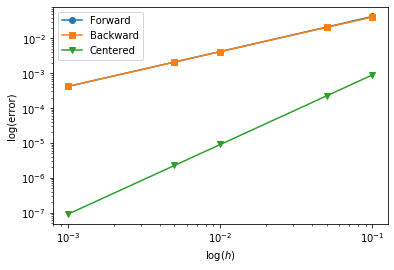

In [12]:
plt.plot(h,ef,'o-',label='Forward')
plt.plot(h,eb,'s-',label='Backward')
plt.plot(h,ec,'v-',label='Centered')
plt.loglog()
plt.legend()
plt.xlabel('log($h$)')
plt.ylabel('log(error)')

### Ejercicio
Agregar una función para calcular la derivada con la siguiente aproximación de cuatro puntos:

$
D_3 u = \dfrac{1}{6 h} 
\left[ 2u_{i+1} + 3u_{i} - 6u_{i-1} + u_{i-2} \right]
$

y completar la gráfica con todos los errores.

In [14]:
def D3(u,x,h):
    """ Esquema de diferencias finitas centradas
    u : es la función a evaluar
    x : es la posición
    h : es el tamaño de malla.
    """
    return (2*u(x+h)+3*u(x)-6*u(x-h)+ u(x-2*h))/(6*h)

In [15]:
e3 = error(uprime(unos),D3(u,1,h))

In [16]:
dframe = pd.DataFrame(np.array([h,ef,eb,ec, e3]).transpose(), 
                      columns=['$h$','$D_+$', '$D_-$','$D_0$', '$D_3$'])
dframe

,$h$,$D_+$,$D_-$,$D_0$,$D_3$
0,0.100,0.042939,0.041138,9.000537e-04,6.820693e-05
1,0.050,0.021257,0.020807,2.250978e-04,8.649142e-06
2,0.010,0.004216,0.004198,9.004993e-06,6.994130e-08
3,0.005,0.002106,0.002101,2.251257e-06,8.754029e-09
4,0.001,0.000421,0.000421,9.005045e-08,6.997947e-11


Text(0, 0.5, 'log(error)')

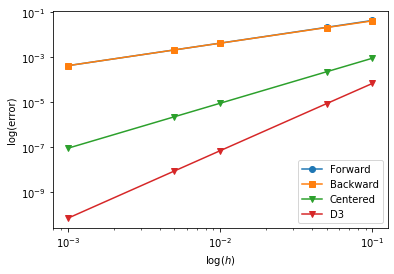

In [17]:
plt.plot(h,ef,'o-',label='Forward')
plt.plot(h,eb,'s-',label='Backward')
plt.plot(h,ec,'v-',label='Centered')
plt.plot(h,e3,'v-',label='D3')

plt.loglog()
plt.legend()
plt.xlabel('log($h$)')
plt.ylabel('log(error)')